Dataset shape: (301, 9)

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    in

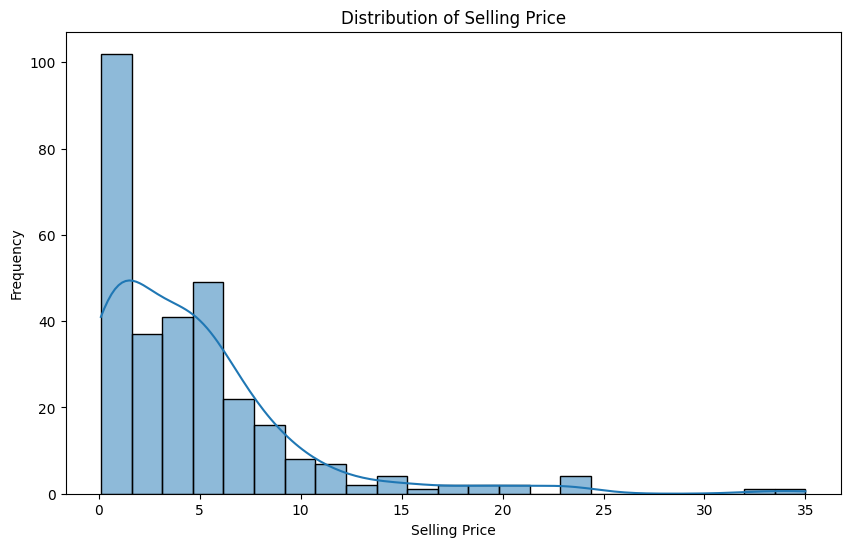

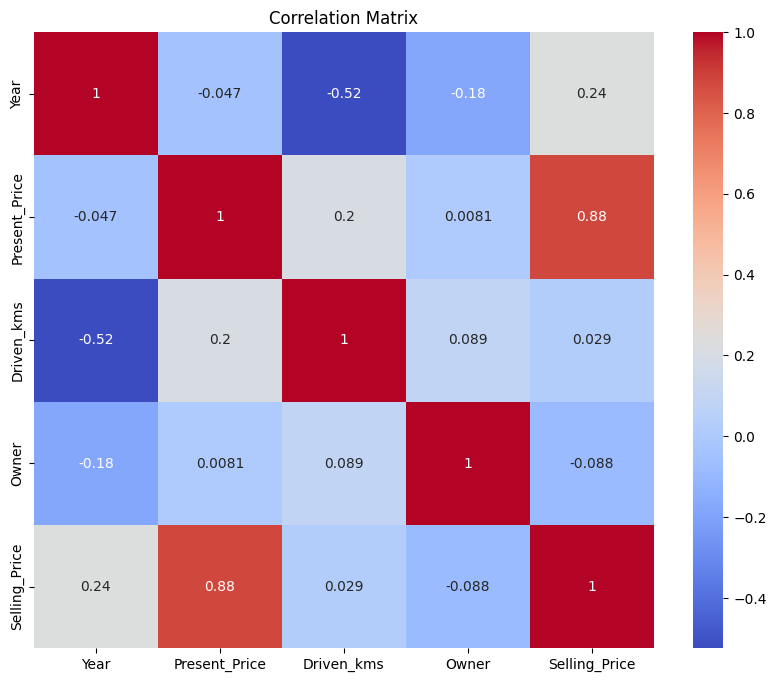


Unique values in categorical columns:
Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Selling_type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']

Random Forest Performance:
MAE: 0.63
MSE: 0.90
RMSE: 0.95
R2 Score: 0.96

Gradient Boosting Performance:
MAE: 0.59
MSE: 0.89
RMSE: 0.95
R2 Score: 0.96

Linear Regression Performance:
MAE: 1.22
MSE: 3.48
RMSE: 1.87
R2 Score: 0.85

Support Vector Performance:
MAE: 0.93
MSE: 3.99
RMSE: 2.00
R2 Score: 0.83

Model Comparison:
                        MAE       MSE      RMSE        R2
Random Forest      0.625790  0.900560  0.948978  0.960906
Gradient Boosting  0.587356  0.894966  0.946027  0.961149
Linear Regression  1.216374  3.481350  1.865838  0.848871
Support Vector     0.932259  3.985254  1.996310  0.826996


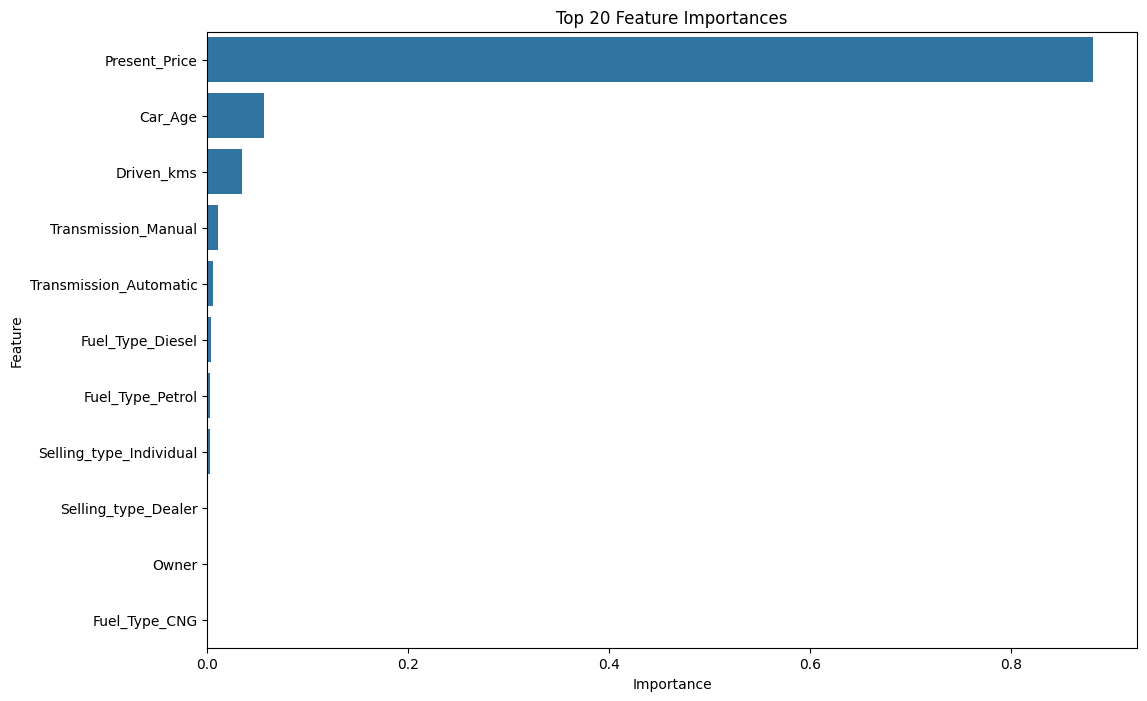


Best parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best RMSE: 1.7207936587395751

Final Model Performance:
RMSE: 0.95
R2 Score: 0.96

Predicted Selling Price for Example Car: ₹8.02


['car_price_predictor.pkl']

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('/content/car data.csv')

# Initial data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Visualize the distribution of the target variable (Selling_Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Visualize correlation between numerical features
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Selling_Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature engineering
# Calculate car age instead of year
df['Car_Age'] = 2023 - df['Year']  # Assuming current year is 2023
df.drop('Year', axis=1, inplace=True)

# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
print("Fuel_Type:", df['Fuel_Type'].unique())
print("Selling_type:", df['Selling_type'].unique())
print("Transmission:", df['Transmission'].unique())

# Preprocessing: Define numerical and categorical features
numerical_features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into features and target
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to try
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Support Vector': SVR()
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Feature importance for the best model (Random Forest in this case)
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))])
best_model.fit(X_train, y_train)

# Get feature names after one-hot encoding
preprocessor.fit(X)
onehot_columns = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_names = numerical_features + onehot_columns

# Get feature importances
importances = best_model.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

# Hyperparameter tuning for the best model
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Final model with best parameters
final_model = grid_search.best_estimator_

# Evaluate final model on test set
y_pred_final = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_r2 = r2_score(y_test, y_pred_final)

print("\nFinal Model Performance:")
print(f"RMSE: {final_rmse:.2f}")
print(f"R2 Score: {final_r2:.2f}")

# Example prediction
example_car = pd.DataFrame({
    'Present_Price': [10.0],
    'Driven_kms': [25000],
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual'],
    'Owner': [0],
    'Car_Age': [5]
})

predicted_price = final_model.predict(example_car)
print(f"\nPredicted Selling Price for Example Car: ₹{predicted_price[0]:.2f}")

# Save the model for future use
import joblib
joblib.dump(final_model, 'car_price_predictor.pkl')